
 **YAPAY SINIR AGLARI (ANN) ILE RAKAM TANIMA**
1. İş Problemi (Business Problem)
2. Veriyi Anlamak (Data Understanding )
3. Veriyi Hazirlamak. (Data Preperation)
4. Modelleme (Modelling)
5. Değerlendirme (Evulation)





1 ) İş Problemi - Insan gücü kaynagını daha verimli kullanabilir miyiz?

*Veri Seti;*

MNIST = ("Modified National Institute of Standards and Technology database")



2) **Veriyi Anlamak (DATA UNDERSTANDING)**

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=UserWarning)
filterwarnings("ignore")

In [ ]:
#Mnist veri setinin Yüklenmesi adimi ;
(xTrain, yTrain), (xTest,yTest) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print("Egitim Seti Boyutu : ",xTrain.shape,yTrain.shape)

Egitim Seti Boyutu :  (60000, 28, 28) (60000,)


In [ ]:
print("Test Seti Boyutu : ",xTest.shape,yTest.shape)

Test Seti Boyutu :  (10000, 28, 28) (10000,)


In [ ]:
num_labels = len(np.unique(yTrain))

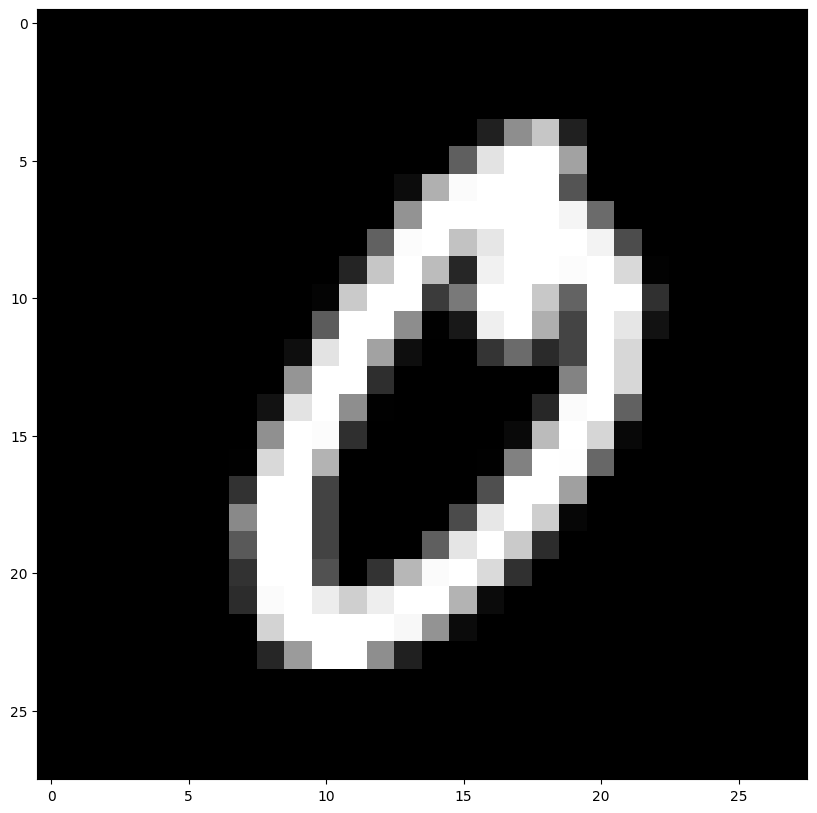

In [ ]:
#Veri setinden ornekler gosterilmesi
plt.figure(figsize=(10,10))
plt.imshow(xTrain[38380],cmap='gray')

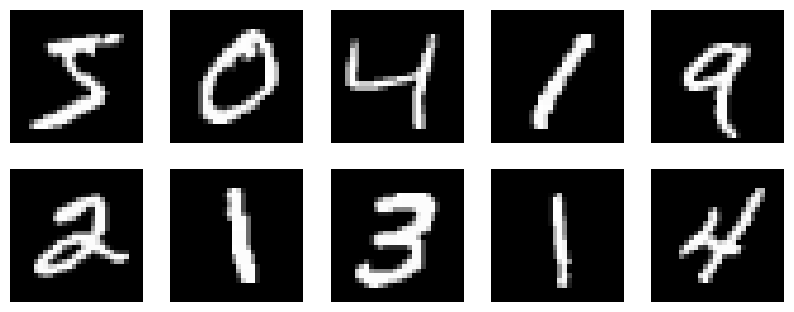

In [ ]:
plt.figure(figsize=(10,10))
for n in range(10):
  ax = plt.subplot(5,5,n+1)
  plt.imshow(xTrain[n],cmap='gray')
  plt.axis('off')

In [ ]:
def visualize_img(data):
  plt.figure(figsize=(10,10))
  for n in range(10):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(data[n],cmap='gray')
    plt.axis('off')

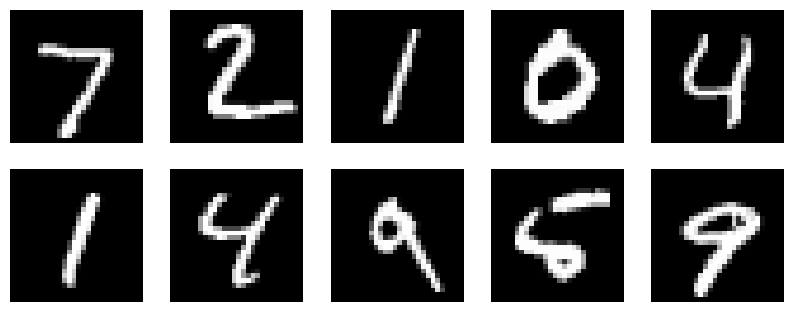

In [ ]:
visualize_img(xTest)

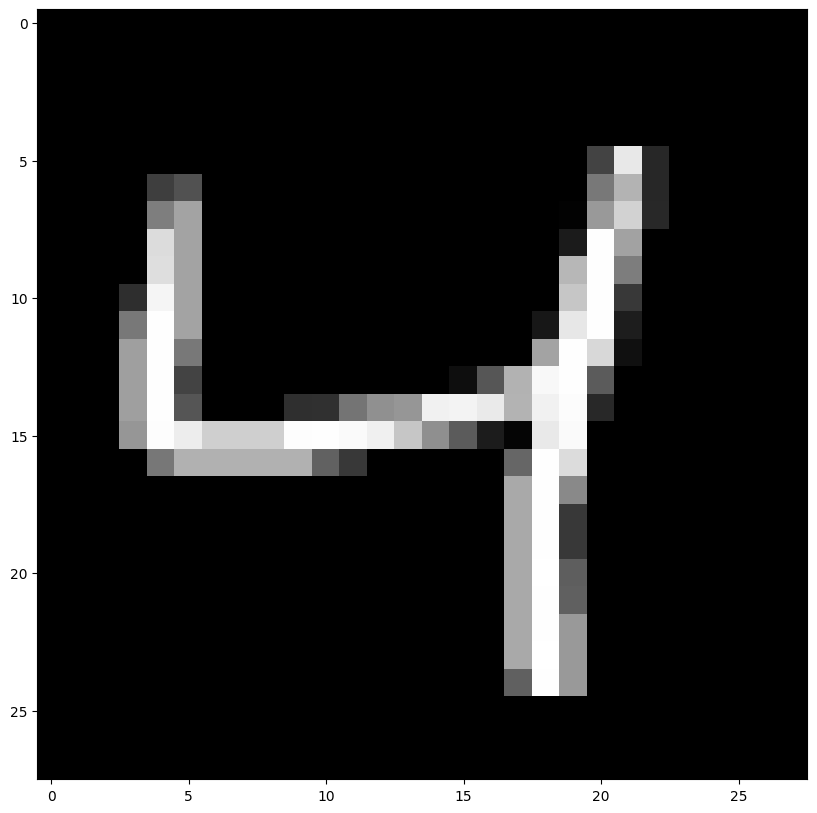

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(xTrain[2],cmap='gray')

RGB(0,0,0)black to (255,255,255)white

r:250 g:10 b:240 = mor

In [ ]:
xTrain[2].shape



(28, 28)

In [ ]:
xTrain[2][14,10] #2. indexteki görselin 10 satır 10 sütununun renk kodu

49

In [ ]:
xTrain[2].mean() #ortalama aldık


24.799744897959183

In [ ]:
xTrain[2].sum() #toplamını aldık

19443

In [ ]:
xTrain[2][0:15,0:5] # resmin sol üstünde dörtgen bi alanı ele alıyoruz

array([[  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  62],
       [  0,   0,   0,   0, 126],
       [  0,   0,   0,   0, 220],
       [  0,   0,   0,   0, 222],
       [  0,   0,   0,  46, 245],
       [  0,   0,   0, 120, 254],
       [  0,   0,   0, 159, 254],
       [  0,   0,   0, 159, 254],
       [  0,   0,   0, 159, 254]], dtype=uint8)

In [ ]:
xTrain[2][0:15,0:5].mean()

33.78666666666667

In [ ]:
def pixel_visualize(img): # Veriseti elemanı görselleştirme fonksiyonu
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')
  width, height = img.shape

  threshold = img.max() / 2.5

  for x in range(width):
    for y in range(height):

      ax.annotate(str(round(img[x] [y], 2)), xy = (y, x),
                  color = 'white' if img[x][y]<threshold else 'black')


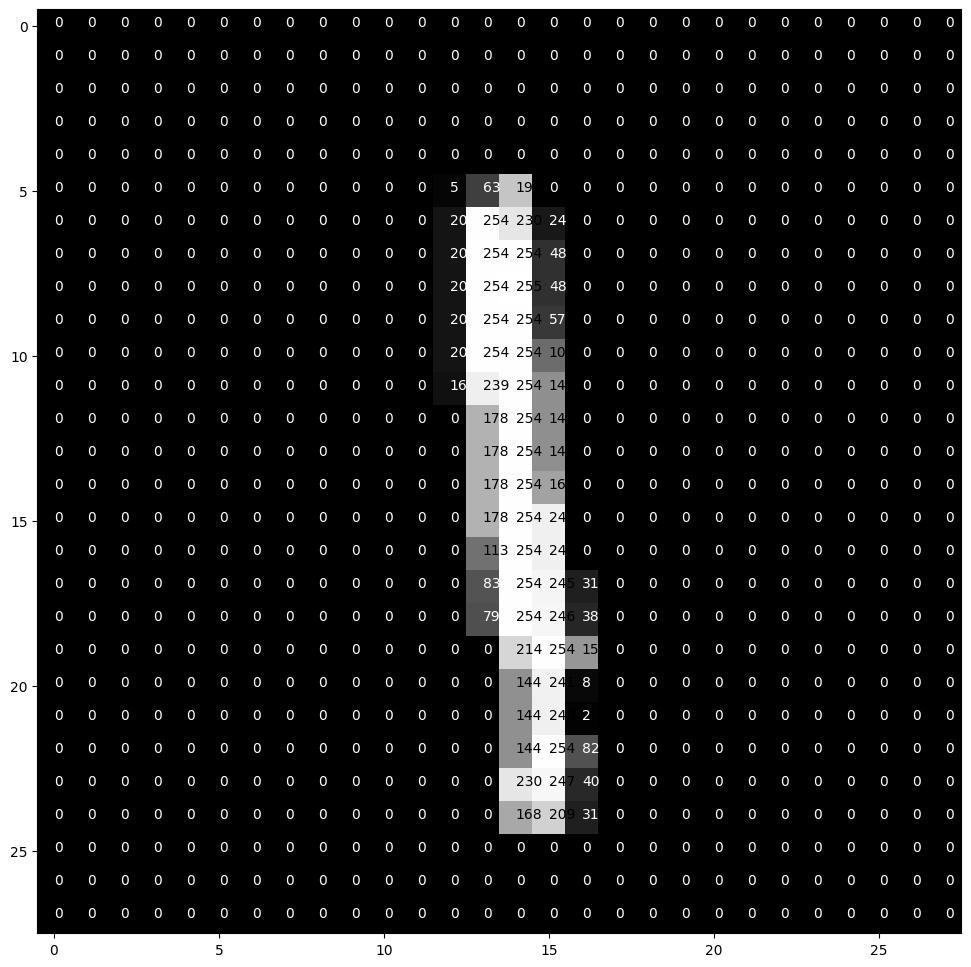

In [ ]:
pixel_visualize(xTrain[8])

**VERIYI HAZIRLAMA (DATA PREPARATION)**










> encoding

Önce: [0 1 2 3 4 5 6 7 8 9]
Sonra:[0 0 1 0 0 0 0 0 0 0]






In [ ]:
yTrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
yTrain = to_categorical(yTrain)
yTest = to_categorical(yTest)

In [ ]:
yTrain[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)



> reshaping





In [ ]:
image_size = xTrain.shape[1]

image_size

28

In [ ]:
print(f"xTrain boyutu  {xTrain.shape}")
print(f"xTEst boyutu:  {xTest.shape}")


xTrain boyutu  (60000, 28, 28)
xTEst boyutu:  (10000, 28, 28)


In [ ]:
xTrain = xTrain.reshape(xTrain.shape[0],28,28,1)
xTest = xTest.reshape(xTest.shape[0],28,28,1)

print(f"xTrain boyutu  {xTrain.shape}")
print(f"xTEst boyutu:  {xTest.shape}")



xTrain boyutu  (60000, 28, 28, 1)
xTEst boyutu:  (10000, 28, 28, 1)




> normalization



tüm değerleri 255 e bölersek degerler rgb oldugu ve 0,255 arasında uzandığı için. Değerlerimizi 0-1 arasına alıp standartlaştırmış oluruz

In [ ]:
xTrain = xTrain.astype('float32') / 255
xTest = xTest.astype('float32') / 255

**MODELLEME**


Sinir Agi Mimarisini Tanimlamak

In [ ]:
model = tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128, activation='relu',name='layer1'), #hidden layer
    Dense(units=num_labels, activation='softmax',name='output_layer')])

model.compile(loss='categorical_crossentropy',
              optimizer = 'adam', ##loss fonksiyonunu minimize edecek fonk. (adam)
              metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])

tf.keras.Sequential: Bu, bir sıralı (sequential) model oluşturmak için kullanılan bir Keras sınıfıdır. Bu tür bir modelde katmanlar ardışık olarak birbirine bağlanır.

Flatten(input_shape=(28, 28, 1)): Bu, girdi verilerini düzleştiren (flatten) bir katmandır. Girdi veri 28x28 piksellik siyah beyaz bir görüntüdür, bu nedenle input_shape parametresi (28, 28, 1) olarak belirtilir. Son boyut 1, çünkü görüntüler tek kanallı (siyah beyaz) olarak kabul ediliyor.

Dense(units=128, activation='relu', name='layer1'): Bu, tam bağlantılı (fully connected) bir gizli katmandır. units, katmandaki nöron (node) sayısını belirtir. Aktivasyon fonksiyonu olarak 'relu' (Rectified Linear Activation) kullanılır. Bu katman, girdiyi 128 boyutlu özetlemek için kullanılır.

Dense(units=num_labels, activation='softmax', name='output_layer'): Bu, çıkış katmanıdır. num_labels, çıkış sınıf sayısını belirtir. Bu katmanda softmax aktivasyon fonksiyonu kullanılır. Softmax, sınıflar arasındaki olasılıkları normalize eder ve sınıf tahminleri elde etmek için sıklıkla kullanılır.

Toplamda, bu model, 28x28 piksellik siyah beyaz el yazısı rakamlarını girdi olarak alır, bunları düzleştirir, ardından 128 nöronlu gizli bir katmanda özetler ve son olarak çıkış katmanında sınıf tahminleri üretir.

Flatten katmanından sonra gelen tam bağlantılı (Dense) katmanlar, girdi verilerini düzleştirdikten sonra bu verileri işlemek ve öğrenmek için kullanılır. Çıkış katmanı ise, tahminlerin yapılması için kullanılır.


*MODEL COMPILE*

model.compile(): Bu yöntem, modeli derlemek ve eğitim için gerekli yapılandırmaları yapmak için kullanılır.

loss='categorical_crossentropy': Kayıp fonksiyonu olarak kullanılacak kayıp metriğini belirtir. Bu durumda, çok sınıflı sınıflandırma için yaygın bir kayıp fonksiyonu olan 'categorical_crossentropy' kullanılıyor. Bu fonksiyon, tahminlerin gerçek etiketlerden ne kadar uzak olduğunu ölçer.

optimizer='adam': Optimizasyon algoritmasını belirtir. 'Adam' optimizerı, adaptif moment tahmini (adaptive moment estimation) tekniğini kullanarak verileri optimize eder. Bu optimizer, genellikle makine öğrenimi modellerinde tercih edilen bir seçenektir.

metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"]: Eğitim sırasında takip edilecek metrikleri belirtir. Burada 3 farklı metrik belirtilmiş:

tf.keras.metrics.Precision(): Hassasiyet metriği. Doğru pozitif tahminlerin toplam pozitif tahminlere oranını hesaplar.
tf.keras.metrics.Recall(): Duyarlılık metriği. Gerçek pozitif tahminlerin toplam gerçek pozitif örneklere oranını hesaplar.
"accuracy": Doğruluk metriği. Doğru tahminlerin toplam örneklere oranını hesaplar


In [ ]:
model.summary() # modelin özeti

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Bu derleme aşamasından sonra, model eğitilmeye hazır hale gelir. model.fit() fonksiyonu kullanılarak model eğitimi gerçekleştirilebilir. Bu işlemden sonra model, veriye göre ayarlanmış ağırlıklarla eğitilmiş olur ve belirtilen metrikler ve kayıp fonksiyonu kullanılarak eğitim sırasında performansını izleyebilirsiniz.






In [ ]:
print(len(xTrain), len(yTrain))

60000 60000


In [ ]:
xTrain.size


47040000

In [ ]:
model.fit(xTrain, yTrain, epochs=10, batch_size=128, validation_data=(xTest, yTest))


Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.3524 - precision: 0.9464 - recall: 0.8524 - accuracy: 0.9028 - val_loss: 0.1908 - val_precision: 0.9583 - val_recall: 0.9336 - val_accuracy: 0.9448
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1625 - precision: 0.9652 - recall: 0.9441 - accuracy: 0.9541 - val_loss: 0.1374 - val_precision: 0.9693 - val_recall: 0.9537 - val_accuracy: 0.9602
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1159 - precision: 0.9738 - recall: 0.9602 - accuracy: 0.9664 - val_loss: 0.1086 - val_precision: 0.9730 - val_recall: 0.9623 - val_accuracy: 0.9667
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0888 - precision: 0.9793 - recall: 0.9695 - accuracy: 0.9741 - val_loss: 0.0978 - val_precision: 0.9763 - val_recall: 0.9665 - val_accuracy: 0.9708
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0718 - precision: 0.9835 - r

**MODEL BAŞARISINI DEGERLENDİRME (EVULATION)**

In [ ]:
history = model.fit(xTrain, yTrain, epochs=10, batch_size=128, validation_data=(xTest, yTest))


Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0245 - precision: 0.9948 - recall: 0.9928 - accuracy: 0.9939 - val_loss: 0.0656 - val_precision: 0.9815 - val_recall: 0.9777 - val_accuracy: 0.9787
Epoch 2/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0206 - precision: 0.9957 - recall: 0.9940 - accuracy: 0.9948 - val_loss: 0.0748 - val_precision: 0.9789 - val_recall: 0.9760 - val_accuracy: 0.9772
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0189 - precision: 0.9959 - recall: 0.9947 - accuracy: 0.9953 - val_loss: 0.0713 - val_precision: 0.9799 - val_recall: 0.9776 - val_accuracy: 0.9788
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0156 - precision: 0.9968 - recall: 0.9957 - accuracy: 0.9964 - val_loss: 0.0668 - val_precision: 0.9803 - val_recall: 0.9782 - val_accuracy: 0.9788
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0125 - precision: 0.9978 - r

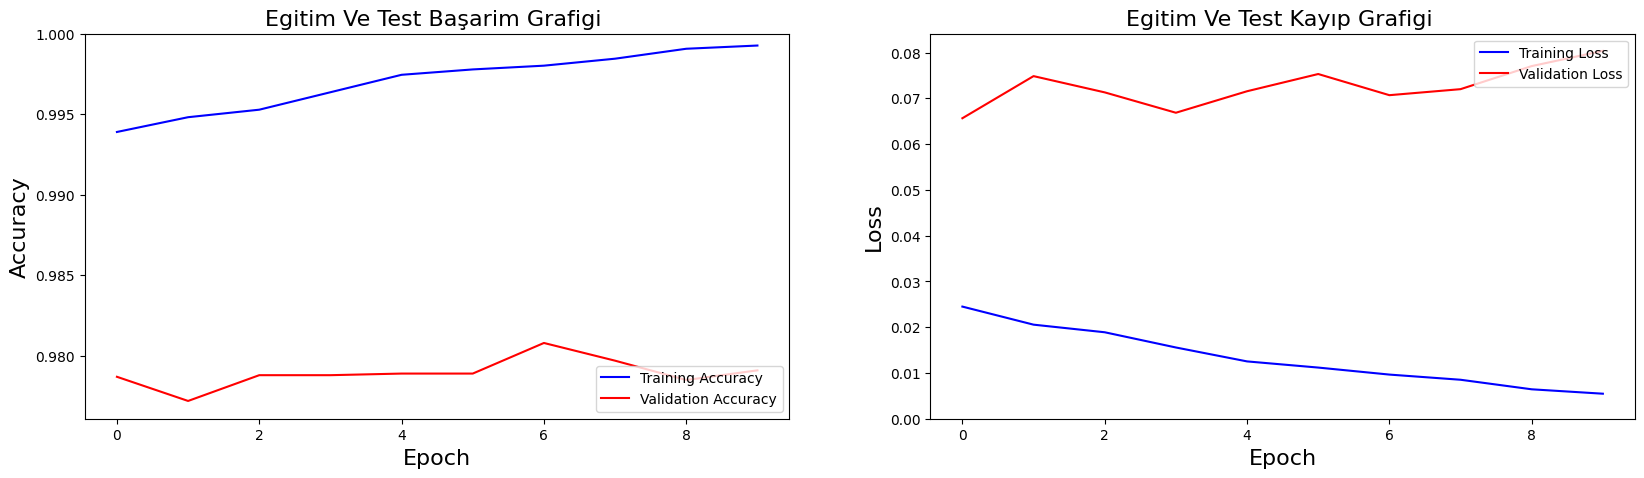

In [ ]:
###############################
# ACCURACY VE LOSS GRAFIKLERI #
###############################

#---------------GRAFİK 1 ACCURACY
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],color = 'b', label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'],color = 'r', label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Egitim Ve Test Başarim Grafigi ', fontsize=16)

#----------- GRAFİK 2 LOSS
plt.subplot(1,2,2)
plt.plot(history.history['loss'],color = 'b', label = 'Training Loss')
plt.plot(history.history['val_loss'],color = 'r', label = 'Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Egitim Ve Test Kayıp Grafigi ', fontsize=16)
plt.show()




In [ ]:
loss, precision, recall, acc = model.evaluate(xTest,yTest,verbose = False)
print("\nTest Accuracy :%.lf%%" % (100.0 * acc))
print('\nTest Loss :%.lf%%' % (100.0 * loss))
print('\nTest Precision :%.lf%%' % (100.0 * precision))
print('\nTest Recall :%.lf%%' % (100.0 * recall))


Test Accuracy :98%

Test Loss :8%

Test Precision :98%

Test Recall :98%


**MODELİN KAYDEDİLMESİ VE TAHMİN İÇİN KULLANILMASI**

In [ ]:
model.save("mnist_model.h5")

In [ ]:
import random

random = random.randint(0,xTest.shape[0])

In [ ]:
random


8495

In [ ]:
test_image = xTest[random]


In [ ]:
yTest[random]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

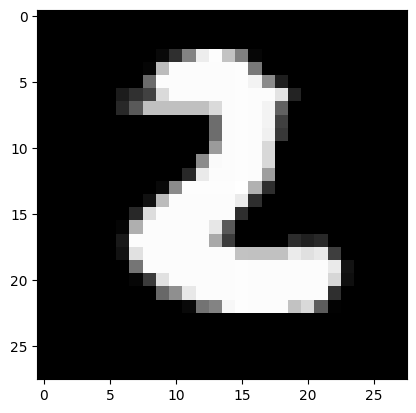

In [ ]:
plt.imshow(test_image.reshape(28,28),cmap='gray')

In [ ]:
test_data = xTest[random].reshape(1,28,28,1)

In [ ]:
probability = model.predict(test_data)

1/1 [==============================] - 0s 138ms/step


In [ ]:
probability

array([[4.4155327e-18, 5.9137955e-12, 9.9999976e-01, 2.8938723e-07,
        1.8037979e-20, 1.9149961e-14, 2.3777484e-14, 9.3246003e-19,
        4.8809388e-09, 1.2939086e-22]], dtype=float32)

In [ ]:
predicted_classes = np.argmax(probability)

In [ ]:
predicted_classes

2